# Importing flat files from the Web

Learning:
* How to use Python to import and locally save datasets from the world wide web
* How to load such datasets into pandas dataframes directly from the web.
* Place these skills in the wider context of making HTTP requests. 
  - Make **HTTP GET requests** = getting data from the web
* Learn the basics of scraping HTML from the internet.
* Use the package **BeautifulSoup** to parse the HTML and turn it into data.
* Other packages to interact with HTML are:
  - urllib
  - requests packages


## Urllib Package

This module provides a high-level interface for fetching data across the World Wide Web.

**urlopen()** - accepts URLs instead of file names (similar to the built-in function).

In [4]:
# How to automate file download in Python 
from urllib.request import urlretrieve

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
urlretrieve(url, 'winequality-white.csv')

('winequality-white.csv', <http.client.HTTPMessage at 0x2be4933d160>)

The flat file contains tabular data of physiochemical properties of red wine, such as pH, alcohol content and citric acid content, along with wine quality rating.

In [5]:
# Import package
from urllib.request import urlretrieve

# Import pandas
import pandas as pd

# Assign url of file: url
url = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'

# Save file locally
urlretrieve(url, 'winequality-red.csv')

# Read file into a DataFrame and print its head
df = pd.read_csv('winequality-red.csv', sep=';')
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

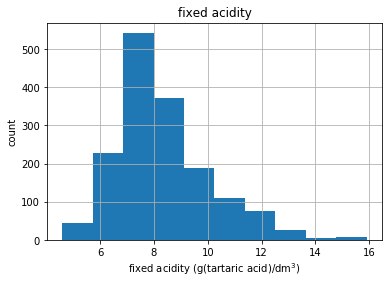

In [7]:
# Import packages
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# Assign url of file: url
url = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'

# Read file into a DataFrame: df
df = pd.read_csv(url, sep=";")

# Print the head of the DataFrame
print(df.head())

# Plot first column of df
pd.DataFrame.hist(df.iloc[:, 0:1])
plt.xlabel('fixed acidity (g(tartaric acid)/dm$^3$)')
plt.ylabel('count')
plt.show()

In [8]:
# Assign url of file: url
url = 'http://s3.amazonaws.com/assets.datacamp.com/course/importing_data_into_r/latitude.xls'

# Read in all sheets of Excel file: xls
xls = pd.read_excel(url, sheet_name=None)

# Print the sheetnames to the shell
print(xls.keys())

# Print the head of the first sheet (using its name, NOT its index)
print(xls['1700'].head())


odict_keys(['1700', '1900'])
                 country       1700
0            Afghanistan  34.565000
1  Akrotiri and Dhekelia  34.616667
2                Albania  41.312000
3                Algeria  36.720000
4         American Samoa -14.307000


## HTTP requests to import files from the web

**URL** - Uniform / Universal Resource Locator
 - References to web resources
 - Focus = **Web Addresses**
 - Others = **File Transfer Protocols *(FTP)* and Database Access**
 
 
The URL consists of 2 parts:
 - **Protocol Identifier** - http / https
 - **Resource Name** - google.com / datacamp.com
 

**HTTP** - HyperText Transfer Protocol 
 - Is an application for distributed, collaborative, hypermedia information systems.
 
HTTPS is a more secure form of HTTP.

Every time someone is going to a website, is sending an HTTP request. This request is known as **GET** request. By far, the most common type of HTTP request.

**urlretrieve()** = performs a *GET* request.
 - Also saves the relevant data locally
 
**HTML** = HyperText Markup Language

In [9]:
from urllib.request import urlopen, Request

url = "https://www.wikipedia.org/"
request = Request(url) # Package the GET request
response = urlopen(request) # Send the request and catech the response
html = response.read() # Returns the HTML as a string
response.close

<bound method HTTPResponse.close of <http.client.HTTPResponse object at 0x000002BE4BF2C630>>

## Requests 

"Requests allows you to send organic, grass-fed HTTP/1 dot 1 requests, without the need for manual labor".

In [10]:
import requests

url = 'https://www.wikipedia.org/'
r = requests.get(url)
text = r.text

In [11]:
url = "http://www.datacamp.com/teach/documentation"

# This packages the request: request
request = Request(url)

# Sends the request and catches the response: response
response = urlopen(request)

# Print the datatype of response
print(type(response))

# Be polite and close the response!
response.close()

<class 'http.client.HTTPResponse'>


In [12]:
# Specify the url
url = "http://www.datacamp.com/teach/documentation"

# This packages the request
request = Request(url)

# Sends the request and catches the response: response
response = urlopen(request)

# Extract the response: html
html = response.read()

# Print the html
print(html)

# Be polite and close the response!
response.close()

b'<!doctype html>\n<html lang="en" data-direction="ltr">\n  <head>\n    <link href="https://fonts.intercomcdn.com" rel="preconnect" crossorigin>\n      <script src="https://www.googletagmanager.com/gtag/js?id=UA-39297847-9" async="async" nonce="OLpjYa6K7Rh5H4/w8ire5kOSrust6y8q25c6abdyAVA="></script>\n      <script nonce="OLpjYa6K7Rh5H4/w8ire5kOSrust6y8q25c6abdyAVA=">\n        window.dataLayer = window.dataLayer || [];\n        function gtag(){dataLayer.push(arguments);}\n        gtag(\'js\', new Date());\n        gtag(\'config\', \'UA-39297847-9\');\n</script>\n    <meta charset="utf-8">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge">\n    <title>DataCamp Help Center</title>\n    <meta name="description" content="">\n    <meta name="viewport" content="width=device-width, initial-scale=1">\n\n      <link rel="alternate" href="http://instructor-support.datacamp.com/en/" hreflang="en">\n\n      <meta name="intercom:trackingEvent" content="{&quot;name&quot;:&quot;Viewed Help Cen

In [13]:
# Specify the url: url
url = "http://www.datacamp.com/teach/documentation"

# Packages the request, send the request and catch the response: r
r = requests.get(url)

# Extract the response: text
text = r.text

# Print the html
print(text)

<!doctype html>
<html lang="en" data-direction="ltr">
  <head>
    <link href="https://fonts.intercomcdn.com" rel="preconnect" crossorigin>
      <script src="https://www.googletagmanager.com/gtag/js?id=UA-39297847-9" async="async" nonce="rf1e9WX0aqD/YKDm+gpXNnf3wTkYDmZRjGHQNV5jj7s="></script>
      <script nonce="rf1e9WX0aqD/YKDm+gpXNnf3wTkYDmZRjGHQNV5jj7s=">
        window.dataLayer = window.dataLayer || [];
        function gtag(){dataLayer.push(arguments);}
        gtag('js', new Date());
        gtag('config', 'UA-39297847-9');
</script>
    <meta charset="utf-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <title>DataCamp Help Center</title>
    <meta name="description" content="">
    <meta name="viewport" content="width=device-width, initial-scale=1">

      <link rel="alternate" href="http://instructor-support.datacamp.com/en/" hreflang="en">

      <meta name="intercom:trackingEvent" content="{&quot;name&quot;:&quot;Viewed Help Center&quot;,&quot;metadata&qu

# Scrapping the web in Python

**"Tag Soup"** = in web development refers to structurally or syntactically incorrect HTML code written for a web page.

**Beautiful Soup** = it make tag soup beautiful again and extract information from it with ease

In [14]:
from bs4 import BeautifulSoup
import requests

In [20]:
url = "https://www.crummy.com/software/BeautifulSoup/"
r = requests.get(url)
html_doc = r.text
soup = BeautifulSoup(html_doc)
print(soup.prettify())

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN" "http://www.w3.org/TR/REC-html40/transitional.dtd">
<html>
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <title>
   Beautiful Soup: We called him Tortoise because he taught us.
  </title>
  <link href="mailto:leonardr@segfault.org" rev="made"/>
  <link href="/nb/themes/Default/nb.css" rel="stylesheet" type="text/css"/>
  <meta content="Beautiful Soup: a library designed for screen-scraping HTML and XML." name="Description"/>
  <meta content="Markov Approximation 1.4 (module: leonardr)" name="generator"/>
  <meta content="Leonard Richardson" name="author"/>
 </head>
 <body alink="red" bgcolor="white" link="blue" text="black" vlink="660066">
  <img align="right" src="10.1.jpg" width="250"/>
  <br/>
  <p>
   You didn't write that awful page. You're just trying to get some
data out of it. Beautiful Soup is here to help. Since 2004, it's been
saving programmers hours or days of work on quick-tur

In [19]:
for link in soup.find_all('a'):
    print(link.get('href'))

bs4/download/
#Download
bs4/doc/
#HallOfFame
https://code.launchpad.net/beautifulsoup
https://bazaar.launchpad.net/%7Eleonardr/beautifulsoup/bs4/view/head:/CHANGELOG
https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup
zine/
https://tidelift.com/subscription/pkg/pypi-beautifulsoup4?utm_source=pypi-beautifulsoup4&utm_medium=referral&utm_campaign=website
zine/
https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup
https://bugs.launchpad.net/beautifulsoup/
https://tidelift.com/security
http://lxml.de/
http://code.google.com/p/html5lib/
bs4/doc/
None
bs4/download/
http://www.crummy.com/software/BeautifulSoup/bs3/documentation.html
download/3.x/BeautifulSoup-3.2.2.tar.gz
https://tidelift.com/subscription/pkg/pypi-beautifulsoup?utm_source=pypi-beautifulsoup&utm_medium=referral&utm_campaign=website
None
http://www.nytimes.com/2007/10/25/arts/design/25vide.html
https://github.com/reddit/reddit/blob/85f9cff3e2ab9bb8f19b96acd8da4ebacc079f04/r2/r2/lib/media.py
http://www.har

In [21]:
# Specify url: url
url = "https://www.python.org/~guido/"

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Extracts the response as html: html_doc
html_doc = r.text

# Create a BeautifulSoup object from the HTML: soup
soup = BeautifulSoup(html_doc)

# Prettify the BeautifulSoup object: pretty_soup
pretty_soup = soup.prettify()

# Print the response
print(pretty_soup)

<html>
 <head>
  <title>
   Guido's Personal Home Page
  </title>
 </head>
 <body bgcolor="#FFFFFF" text="#000000">
  <h1>
   <a href="pics.html">
    <img border="0" src="images/IMG_2192.jpg"/>
   </a>
   Guido van Rossum - Personal Home Page
   <a href="pics.html">
    <img border="0" height="216" src="images/guido-headshot-2019.jpg" width="270"/>
   </a>
  </h1>
  <p>
   <a href="http://www.washingtonpost.com/wp-srv/business/longterm/microsoft/stories/1998/raymond120398.htm">
    <i>
     "Gawky and proud of it."
    </i>
   </a>
  </p>
  <h3>
   <a href="http://metalab.unc.edu/Dave/Dr-Fun/df200004/df20000406.jpg">
    Who
I Am
   </a>
  </h3>
  <p>
   Read
my
   <a href="http://neopythonic.blogspot.com/2016/04/kings-day-speech.html">
    "King's
Day Speech"
   </a>
   for some inspiration.
  </p>
  <p>
   I am the author of the
   <a href="http://www.python.org">
    Python
   </a>
   programming language.  See also my
   <a href="Resume.html">
    resume
   </a>
   and my
   <a hr

In [22]:
# Specify url: url
url = 'https://www.python.org/~guido/'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Extract the response as html: html_doc
html_doc = r.text

# Create a BeautifulSoup object from the HTML: soup
soup = BeautifulSoup(html_doc)

# Get the title of Guido's webpage: guido_title
guido_title = soup.title

# Print the title of Guido's webpage to the shell
print(guido_title)

# Get Guido's text: guido_text
guido_text = soup.text

# Print Guido's text to the shell
print(guido_text)

<title>Guido's Personal Home Page</title>


Guido's Personal Home Page




Guido van Rossum - Personal Home Page


"Gawky and proud of it."
Who
I Am
Read
my "King's
Day Speech" for some inspiration.

I am the author of the Python
programming language.  See also my resume
and my publications list, a brief bio, assorted writings, presentations and interviews (all about Python), some
pictures of me,
my new blog, and
my old
blog on Artima.com.  I am
@gvanrossum on Twitter.

I am retired, working on personal projects (and maybe a book).
I have worked for Dropbox, Google, Elemental Security, Zope
Corporation, BeOpen.com, CNRI, CWI, and SARA.  (See
my resume.)  I created Python while at CWI.

How to Reach Me
You can send email for me to guido (at) python.org.
I read everything sent there, but if you ask
me a question about using Python, it's likely that I won't have time
to answer it, and will instead refer you to
help (at) python.org,
comp.lang.python or
StackOverflow.  If you need to
talk t

In [23]:
# Specify url
url = 'https://www.python.org/~guido/'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Extracts the response as html: html_doc
html_doc = r.text

# create a BeautifulSoup object from the HTML: soup
soup = BeautifulSoup(html_doc)

# Print the title of Guido's webpage
print(soup.title)

# Find all 'a' tags (which define hyperlinks): a_tags
a_tags = soup.find_all('a')

# Print the URLs to the shell
for link in a_tags:
    print(link.get('href'))

<title>Guido's Personal Home Page</title>
pics.html
pics.html
http://www.washingtonpost.com/wp-srv/business/longterm/microsoft/stories/1998/raymond120398.htm
http://metalab.unc.edu/Dave/Dr-Fun/df200004/df20000406.jpg
http://neopythonic.blogspot.com/2016/04/kings-day-speech.html
http://www.python.org
Resume.html
Publications.html
bio.html
http://legacy.python.org/doc/essays/
http://legacy.python.org/doc/essays/ppt/
interviews.html
pics.html
http://neopythonic.blogspot.com
http://www.artima.com/weblogs/index.jsp?blogger=12088
https://twitter.com/gvanrossum
Resume.html
http://groups.google.com/groups?q=comp.lang.python
http://stackoverflow.com
guido.au
http://legacy.python.org/doc/essays/
images/license.jpg
http://www.cnpbagwell.com/audio-faq
http://sox.sourceforge.net/
images/internetdog.gif


## Introduction to APIs and JSONs

**APIs =** Application Programming Interface
 - Is a set of *protocols and routines* for building and **interacting with software applications**.
 - Is a bunch of code...
   + Allows two software programs to communicate with each other
 
This will be done with the **OMDb API** - *Open Movie Database API*

A standard form for transferring data through the APIs is the JSON file format. 

**JSONs =** JavaScript Object Notation
 - Is a file format that arouse out of a growing need for real-time server-to-browser communication that wouldn't necessarily rely on Flash or Java.
 - There are human readable.
 - Consists of name-value pairs separated by commas. - Similar to the Key-value paris in a Python Dictionary.
 - The values could be strings, integers, arrays or even objects.
 - You could have nested JSONs 

# APIs and interacting with the world wide web

Much of the data that you'll get from APIs are packaged as JSONs

In the exercises:
 - Connecting to APIs
 - Pulling data from APIs
 - Parsing data from APIs
 
If you wanted to stream Twitter data by writting some Python code, you would use the Twitter API. 

In [3]:
import requests
import json

url = 'http://www.omdbapi.com/?t=hackers'
r = requests.get(url)
json_data = r.json()

for key, value in json_data.items():
    print(key + ":", value)

Response: False
Error: No API key provided.


**http** - making an HTTP request
**www.omdbapi.com** - querying the OMDB API
**?t=hackers** - Query string, the query we are making to the OMBD API.

In [1]:
# Import requests package
import requests

# Assign URL to variable: url
url = "http://www.omdbapi.com/?apikey=72bc447a&t=the+social+network"

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Print the text of the response
print(r.text)

{"Title":"The Social Network","Year":"2010","Rated":"PG-13","Released":"01 Oct 2010","Runtime":"120 min","Genre":"Biography, Drama","Director":"David Fincher","Writer":"Aaron Sorkin (screenplay), Ben Mezrich (book)","Actors":"Jesse Eisenberg, Rooney Mara, Bryan Barter, Dustin Fitzsimons","Plot":"As Harvard student Mark Zuckerberg creates the social networking site that would become known as Facebook, he is sued by the twins who claimed he stole their idea, and by the co-founder who was later squeezed out of the business.","Language":"English, French","Country":"USA","Awards":"Won 3 Oscars. Another 165 wins & 168 nominations.","Poster":"https://m.media-amazon.com/images/M/MV5BOGUyZDUxZjEtMmIzMC00MzlmLTg4MGItZWJmMzBhZjE0Mjc1XkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_SX300.jpg","Ratings":[{"Source":"Internet Movie Database","Value":"7.7/10"},{"Source":"Rotten Tomatoes","Value":"96%"},{"Source":"Metacritic","Value":"95/100"}],"Metascore":"95","imdbRating":"7.7","imdbVotes":"579,002","imdbID":"tt1285

In [2]:
# Assign URL to variable: url
url = 'http://www.omdbapi.com/?apikey=72bc447a&t=social+network'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Decode the JSON data into a dictionary: json_data
json_data = r.json()

# Print each key-value pair in json_data
for k in json_data.keys():
    print(k + ': ', json_data[k])

Title:  The Social Network
Year:  2010
Rated:  PG-13
Released:  01 Oct 2010
Runtime:  120 min
Genre:  Biography, Drama
Director:  David Fincher
Writer:  Aaron Sorkin (screenplay), Ben Mezrich (book)
Actors:  Jesse Eisenberg, Rooney Mara, Bryan Barter, Dustin Fitzsimons
Plot:  As Harvard student Mark Zuckerberg creates the social networking site that would become known as Facebook, he is sued by the twins who claimed he stole their idea, and by the co-founder who was later squeezed out of the business.
Language:  English, French
Country:  USA
Awards:  Won 3 Oscars. Another 165 wins & 168 nominations.
Poster:  https://m.media-amazon.com/images/M/MV5BOGUyZDUxZjEtMmIzMC00MzlmLTg4MGItZWJmMzBhZjE0Mjc1XkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_SX300.jpg
Ratings:  [{'Source': 'Internet Movie Database', 'Value': '7.7/10'}, {'Source': 'Rotten Tomatoes', 'Value': '96%'}, {'Source': 'Metacritic', 'Value': '95/100'}]
Metascore:  95
imdbRating:  7.7
imdbVotes:  579,002
imdbID:  tt1285016
Type:  movie
DVD:  11

In [6]:
# Import package
import requests

# Assign URL to variable: url
url = "https://en.wikipedia.org/w/api.php?action=query&prop=extracts&format=json&exintro=&titles=pizza"

# Package the request, send the request and catch the response: r
r = requests.get(url, verify=False)

# Decode the JSON data into a dictionary: json_data
json_data = r.json()

# Print the Wikipedia page extract
pizza_extract = json_data['query']['pages']['24768']['extract']
print(pizza_extract)

SSLError: HTTPSConnectionPool(host='en.wikipedia.org', port=443): Max retries exceeded with url: /w/api.php?action=query&prop=extracts&format=json&exintro=&titles=pizza (Caused by SSLError(SSLError("bad handshake: SysCallError(10054, 'WSAECONNRESET')")))